          Sector                    Ordinary Shares  Date          ISIN  \
0        Finance              Access Bank Ghana PLC  2024  GHEABG043772   
1        Finance  Agricultural Development Bank PLC  2024  GHEADB043726   
2         Mining             AngloGold Ashanti PLC.  2024  GB00BRXH2664   
3  Manufacturing                       Aluworks PLC  2024  GH0000000037   
4         Mining            Asante Gold Corporation  2024  CA04341X1078   

  Share Code  Year High         Year Low      Previous Closing Price  \
0     ACCESS              5.20          3.40                    5.20   
1        ADB              5.06          5.06                    5.06   
2        AGA             37.00         37.00                   37.00   
3        ALW              0.10          0.10                    0.10   
4        ASG              8.89          8.89                    8.89   

   Opening Price           Last Transaction Price   Closing Price   \
0                    5.20                     

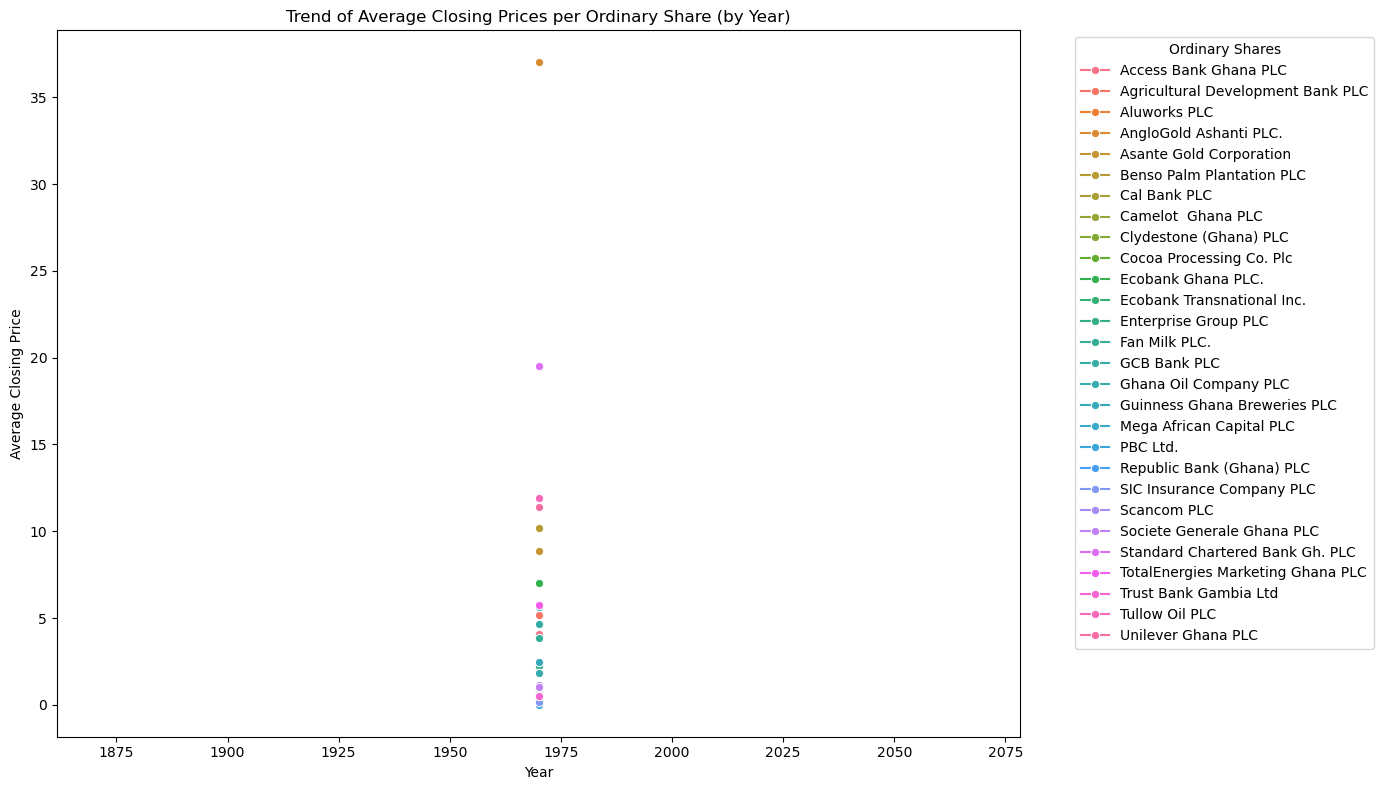

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "Ghana Stock Project.csv"
df = pd.read_csv(file_path)

# Display first few rows to inspect
print(df.head())

# Convert 'Date' to datetime and extract 'Year'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df['Year'] = df['Date'].dt.year

# Clean column names if needed (strip spaces)
df.columns = df.columns.str.strip()

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Ordinary Shares', 'Closing Price', 'Year'])

# Group by Ordinary Shares and Year, calculate average closing price
trend_data = df.groupby(['Ordinary Shares', 'Year'])['Closing Price'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='Year', y='Closing Price', hue='Ordinary Shares', marker='o')
plt.title("Trend of Average Closing Prices per Ordinary Share (by Year)")
plt.ylabel("Average Closing Price")
plt.xlabel("Year")
plt.legend(title='Ordinary Shares', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
